# Bicycle Theft Analysis - Ottawa 2015-2019

### Pip Installations (run this if you do not have the following libraries)

In [39]:
!pip install pandas
!pip install matplotlib
!pip install plotly

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 13.0 MB 6.4 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=17dc7d0cc56c2795bb40728508ff526344cd6d7b9e2d0afdc7b7055f848dab40
  Stored in directory: /Users/vlad/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
theft_df = pd.read_csv('./Bicycle_Theft.csv')
theft_df.head()

,ID,Division,Sector,Report_Date,Incident_Date,Incident_Weekday,Location_Type,Primary_Offence,Neighbourhood,Bicycle_Status,Bicycle_Value,Bicycle_Make,Bicycle_Model,Bicycle_Type,Bicycle_Frame,Bicycle_Colour,Bicycle_Speed,x,y,ObjectId
0,1,West,16,08/02/2015 20:24,08/02/2015 17:30,1,"SINGLE HOME, HOUSE",THEFT<BICYCLE,Old Barrhaven West,STOLEN,80.0,NEXT,NaN,REGULAR,UNISEX,Gray,0,-75.757863,45.279974,1
1,2,West,16,8/24/15 5:15 PM,8/23/15 9:00 PM,1,DWELLING UNIT,THEFT<FRM VEHICL,Old Barrhaven West,STOLEN,1000.0,SCHWINN,NaN,MOUNTAIN,MEN'S,Black; Orange,21,-75.765764,45.269235,2
2,3,West,16,8/25/15 2:57 PM,7/31/15 8:00 PM,6,"SINGLE HOME, HOUSE",THEFT<BICYCLE,Old Barrhaven West,STOLEN,200.0,FREAKSHOW,NaN,BMX,MEN'S,White,1,-75.748062,45.289547,3
3,4,West,16,9/19/15 12:01 PM,9/18/15 3:30 PM,6,"SINGLE HOME, HOUSE",THEFT<BICYCLE,Old Barrhaven West,RECOVERED,499.0,FREE AGENT,SPEEDWAY EXPERT,BMX,MEN'S,Black,1,-75.777076,45.270196,4
4,5,West,16,11/16/15 9:22 PM,11/13/15 5:30 PM,6,SCHOOLS DURING NOT SUPERVISED ACTIVITY,THEFT<BICYCLE,Old Barrhaven West,STOLEN,150.0,CCM,RACER,RACER,UNISEX,"Silver, aluminum, stainless steel",10,-75.762061,45.276617,5


In [12]:
total_thefts = theft_df['ID'].count()
print('Total thefts: {}.'.format(total_thefts))

Total thefts: 5652.


In [14]:
monetary_loss = theft_df['Bicycle_Value'].sum()
print('Total monetary loss: ${}.'.format(monetary_loss))

Total monetary loss: $3678514.0.


In [19]:
average_cost = theft_df['Bicycle_Value'].mean()
print('Average cost of bicycle stolen: ${price:.2f}.'.format(price=average_cost))

Average cost of bicycle stolen: $732.92.


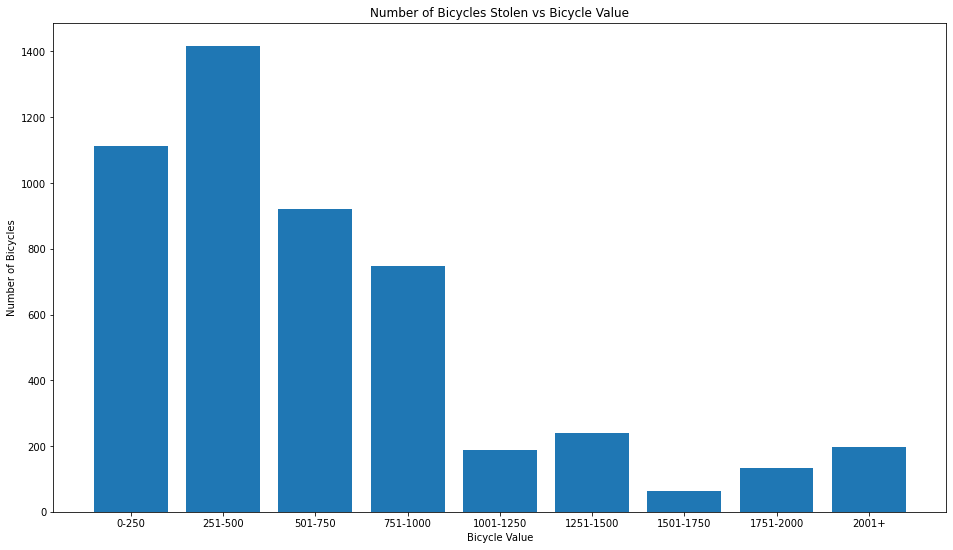

In [37]:
costs = []
names = ['0-250', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000', '2001+']
# [0-250)
cost_0 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 0) & (theft_df['Bicycle_Value'] <= 250)]
costs.append(cost_0.count())


# (250-500]
cost_1 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 250) & (theft_df['Bicycle_Value'] <= 500)]
costs.append(cost_1.count())


# (500-750]
cost_2 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 500) & (theft_df['Bicycle_Value'] <= 750)]
costs.append(cost_2.count())


# (750-1000]
cost_3 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 750) & (theft_df['Bicycle_Value'] <= 1000)]
costs.append(cost_3.count())


# (1000-1250]
cost_4 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 1000) & (theft_df['Bicycle_Value'] <= 1250)]
costs.append(cost_4.count())


# (1250-1500]
cost_5 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 1250) & (theft_df['Bicycle_Value'] <= 1500)]
costs.append(cost_5.count())


# (1500-1750]
cost_6 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 1500) & (theft_df['Bicycle_Value'] <= 1750)]
costs.append(cost_6.count())


# (1750-2000]
cost_7 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 1750) & (theft_df['Bicycle_Value'] <= 2000)]
costs.append(cost_7.count())


# (2000-inf]
cost_8 = theft_df['Bicycle_Value'][(theft_df['Bicycle_Value'] > 2000)]
costs.append(cost_8.count())

plt.bar(names, costs)
plt.title('Number of Bicycles Stolen vs Bicycle Value')
plt.ylabel('Number of Bicycles')
plt.xlabel('Bicycle Value')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [49]:
px.set_mapbox_access_token("pk.eyJ1IjoidmxhZGpkayIsImEiOiJja2YydWRiN2YwMjV6MnVydjd5NzQzdXJ2In0.FK1eN7UGZkrHj7qTdz_sBA")
fig = px.scatter_mapbox(theft_df, lat="y", lon="x",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()